<a href="https://colab.research.google.com/github/AadityaSukhoi/DV-Lab-Experiments/blob/main/LabExperiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Use the covid data and do the following visualization

1. Perform EDA. Check for missing value outliers, multi collinearity.
2. Check imbalance and any other data related issue.
3. Apply ML model to predict the no. of death in each region or country.
4. Apply homogenous or hetrogenous approach for the prediction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('country_wise_latest.csv')

In [ ]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
df.isna().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
df.shape

(187, 15)

In [ ]:
df.nunique()

,0
Country/Region,187
Confirmed,184
Deaths,150
Recovered,178
Active,173
New cases,122
New deaths,38
New recovered,103
Deaths / 100 Cases,145
Recovered / 100 Cases,177


In [ ]:
df.columns.tolist()

['Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Deaths / 100 Cases',
 'Recovered / 100 Cases',
 'Deaths / 100 Recovered',
 'Confirmed last week',
 '1 week change',
 '1 week % increase',
 'WHO Region']

In [ ]:
df.drop_duplicates()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
df.dtypes

,0
Country/Region,object
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
New cases,int64
New deaths,int64
New recovered,int64
Deaths / 100 Cases,float64
Recovered / 100 Cases,float64


# **HANDLING OUTLIERS**

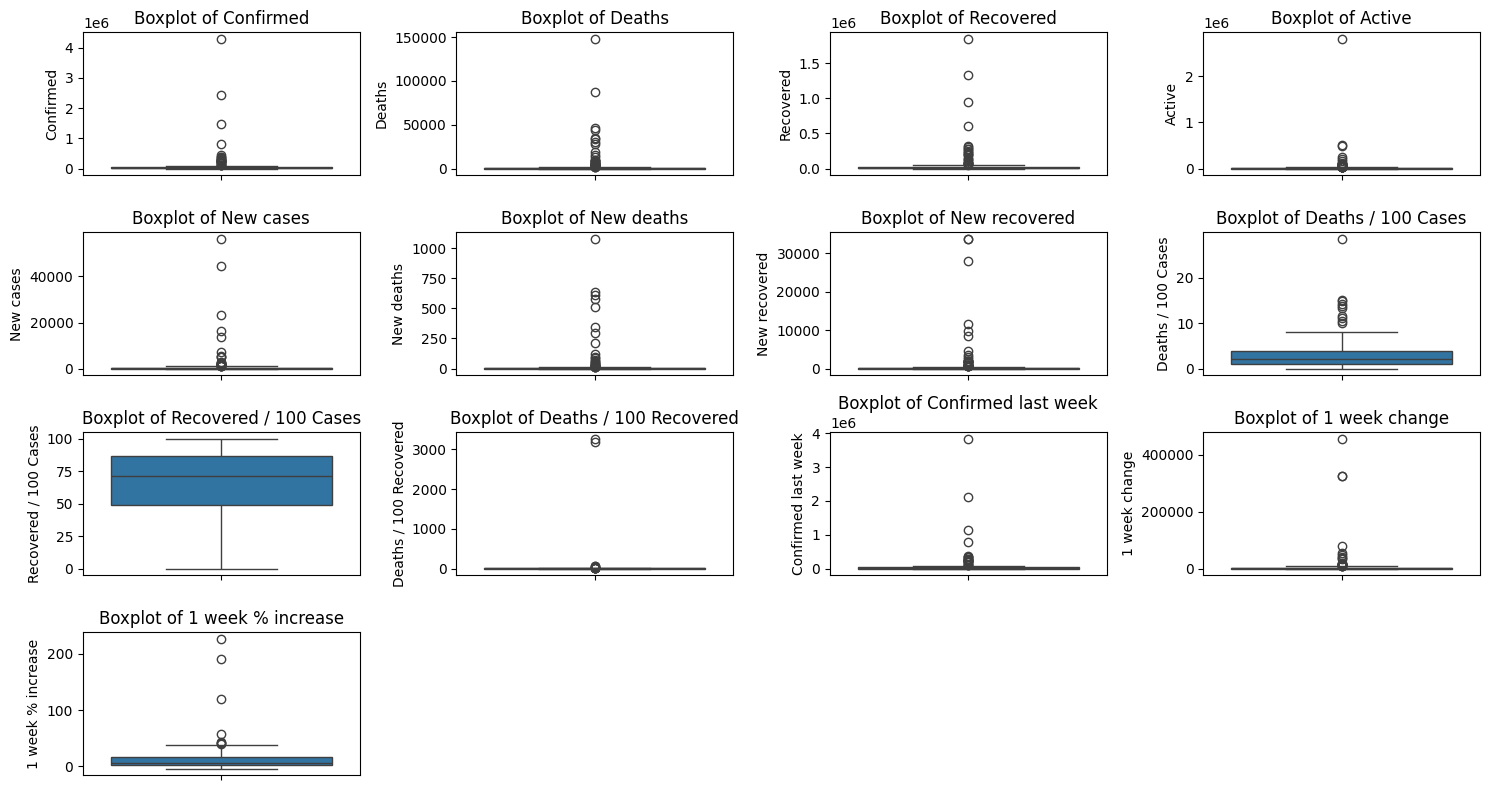

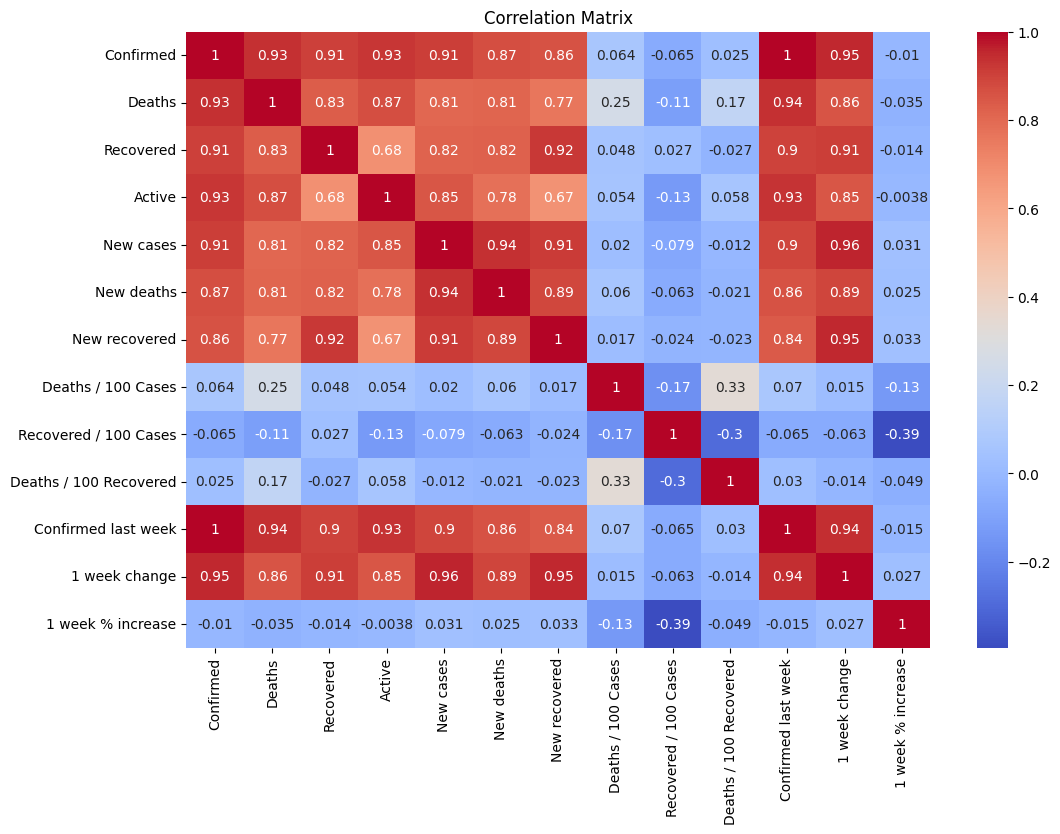

In [ ]:
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
                      'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
                      'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
                      '1 week % increase']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap for multicollinearity check
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

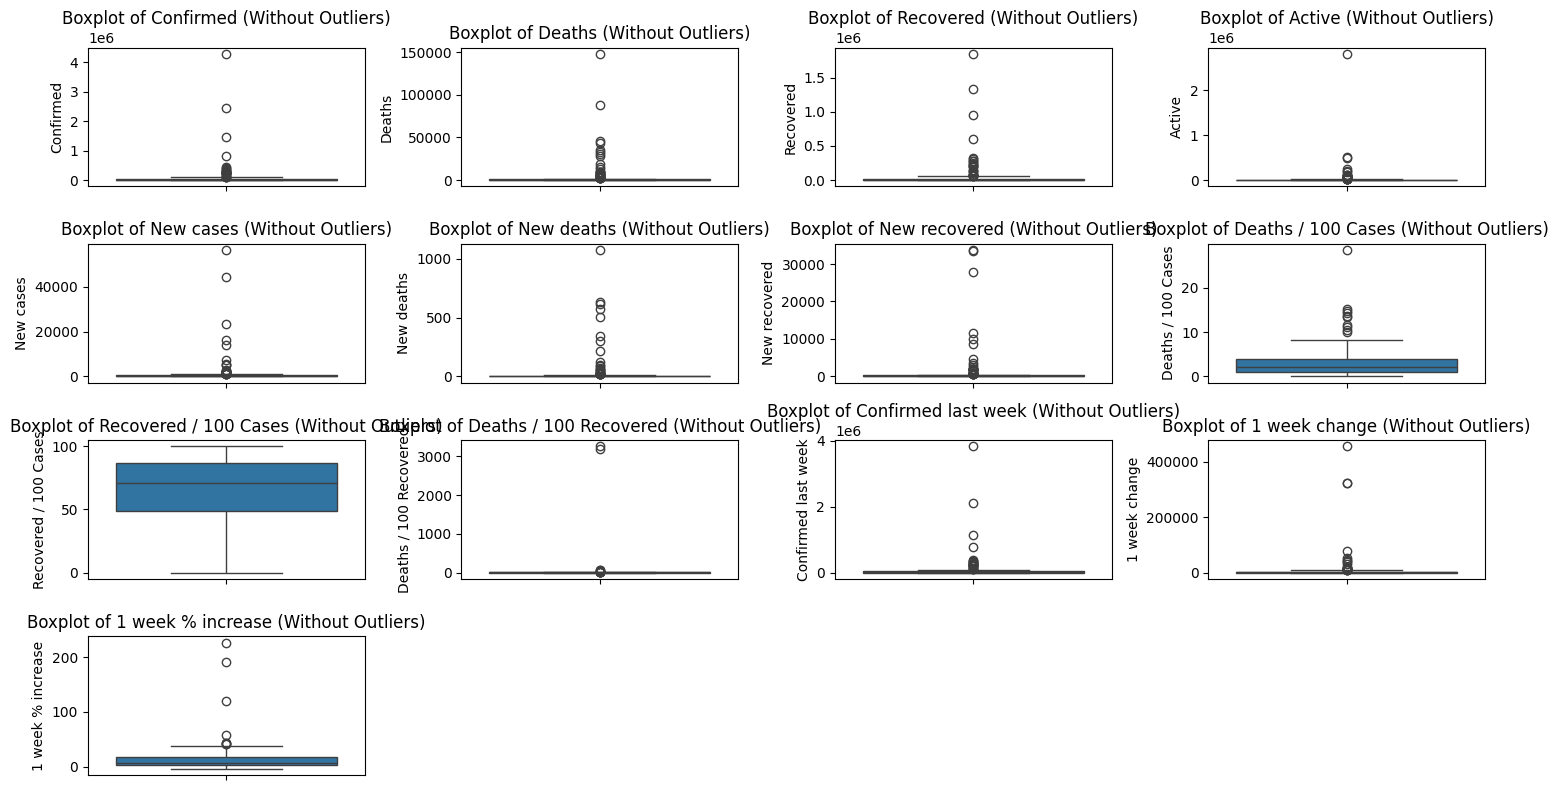

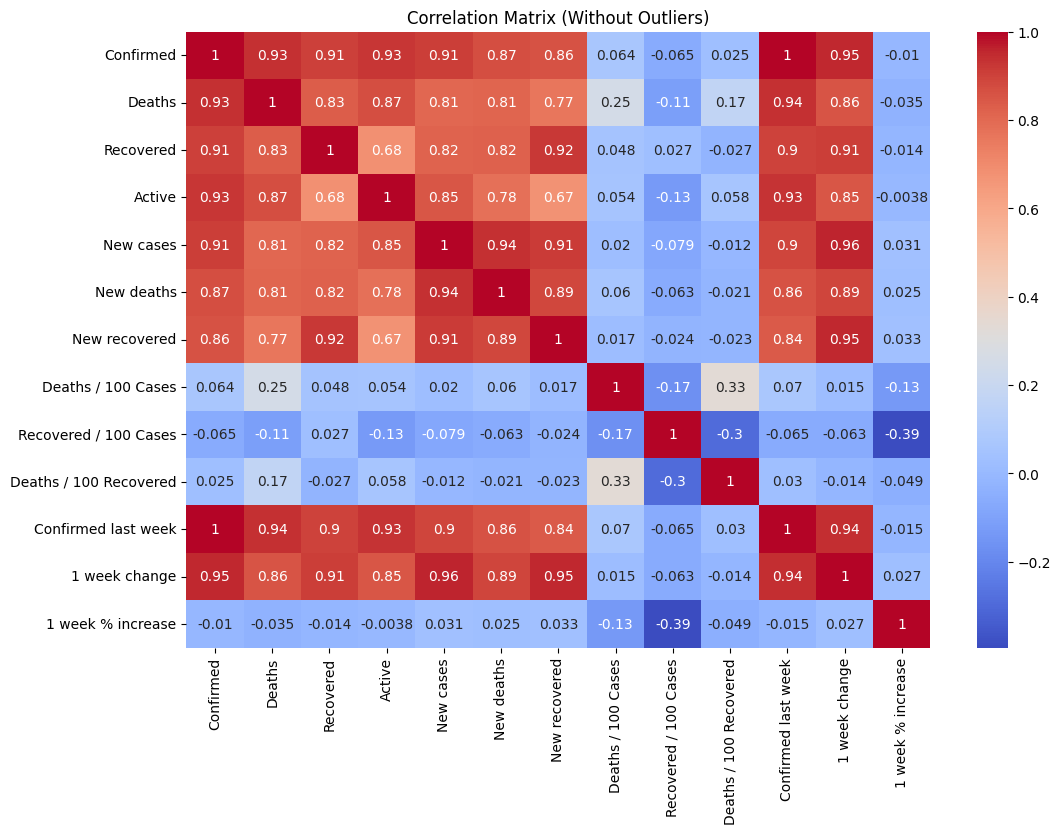

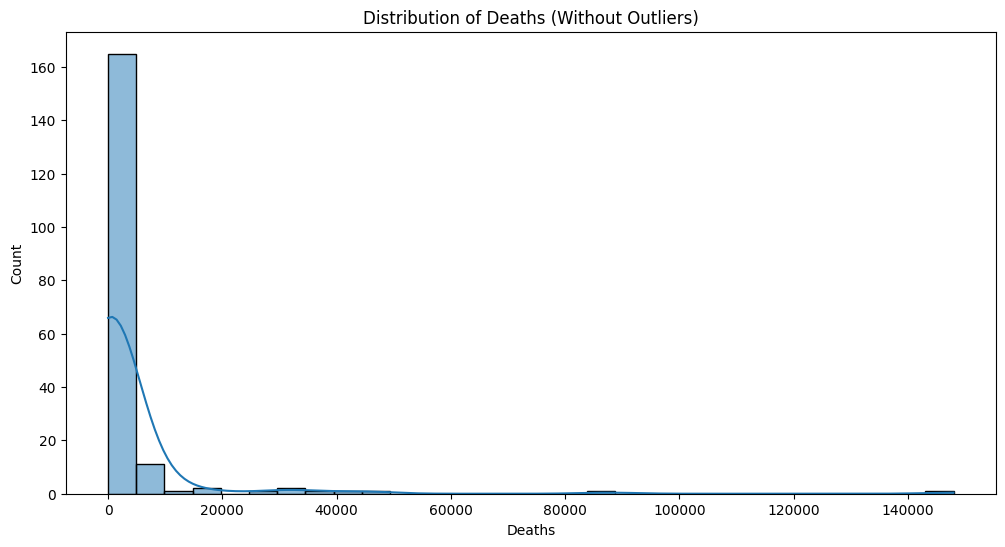

In [ ]:
# Re-plotting the boxplots for numerical features after outlier removal
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col} (Without Outliers)')
plt.tight_layout()
plt.show()

# Re-plotting the correlation matrix after outlier removal
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Without Outliers)')
plt.show()

# Re-plotting the distribution of 'Deaths' after outlier removal
plt.figure(figsize=(12, 6))
sns.histplot(df['Deaths'], kde=True, bins=30)
plt.title('Distribution of Deaths (Without Outliers)')
plt.show()


# **DATA IMBALANCE**

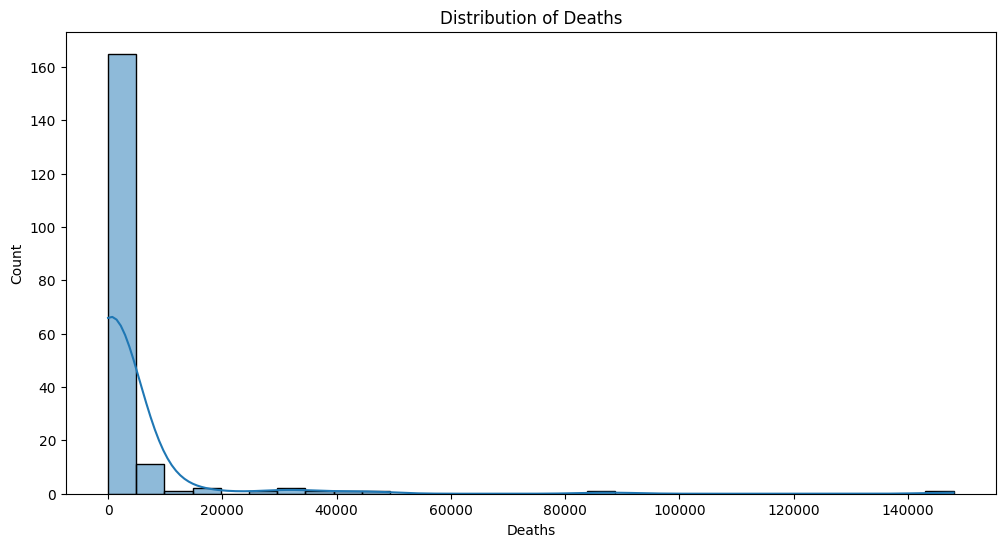

In [ ]:
# Checking data imbalance in the target variable
plt.figure(figsize=(12, 6))
sns.histplot(df['Deaths'], kde=True, bins=30)
plt.title('Distribution of Deaths')
plt.show()

# Feature engineering (e.g., calculating active cases rate)
df['Active_rate'] = (df['Active'] / df['Confirmed']) * 100

# **PREDICTION OF DEATH BY EACH COUNTRY**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Assuming df is already defined with the required data
# Target variable is 'Deaths'
X = df.drop(['Deaths', 'Country/Region', 'WHO Region'], axis=1)  # Drop target and unnecessary columns
y = df['Deaths']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle infinite values
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Check for and handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean for imputation
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Homogeneous approach: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}")
print(f"Random Forest R^2: {r2_score(y_test, rf_predictions)}")

# Heterogeneous approach: Stacking Regressor
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]
stack_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stack_model.fit(X_train, y_train)
stack_predictions = stack_model.predict(X_test)
print(f"Stacking Regressor RMSE: {np.sqrt(mean_squared_error(y_test, stack_predictions))}")
print(f"Stacking Regressor R^2: {r2_score(y_test, stack_predictions)}")

Random Forest RMSE: 6512.528017387555
Random Forest R^2: 0.5053380198590419
Stacking Regressor RMSE: 6926.657053105318
Stacking Regressor R^2: 0.44042707392448976


# **CONFIRMED CASES IN EACH REGION**

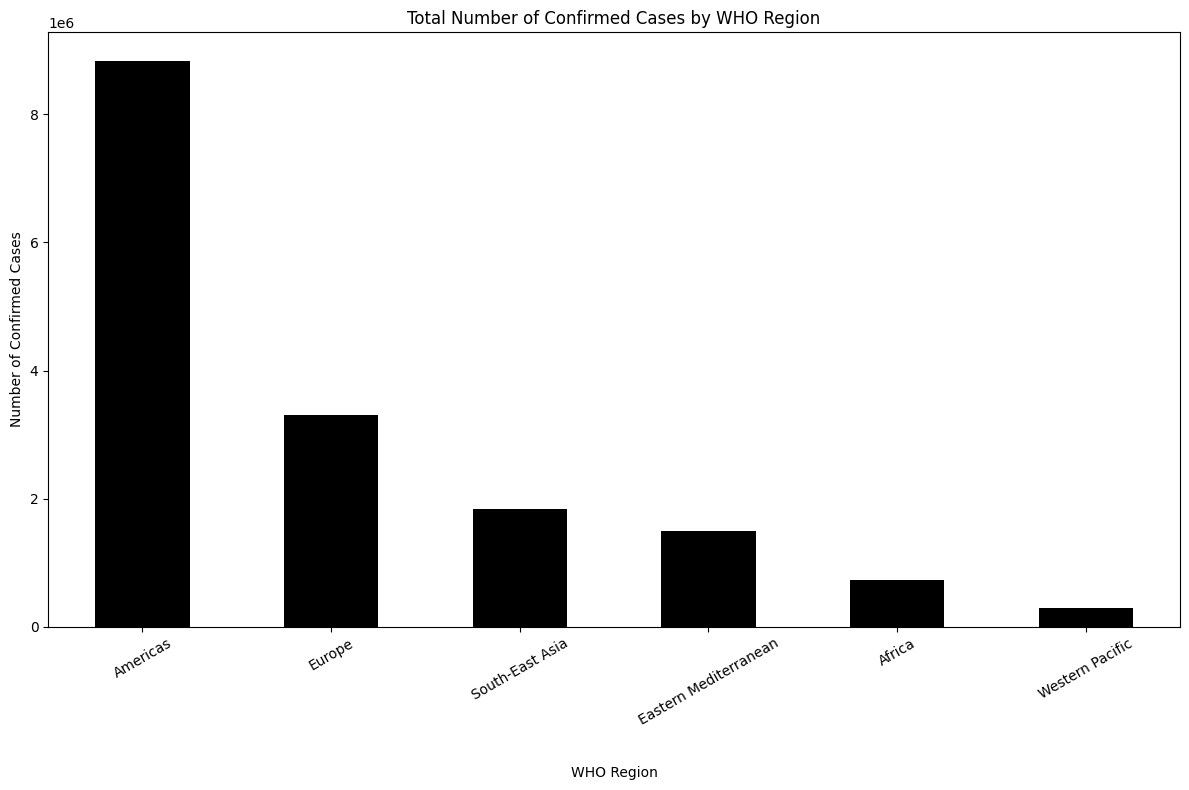

In [ ]:
plt.figure(figsize=(12, 8))
6
confirmed_cases_by_region = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
confirmed_cases_by_region.plot(kind='bar', color='black')
plt.title('Total Number of Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# **DEATH IN EACH REGION**

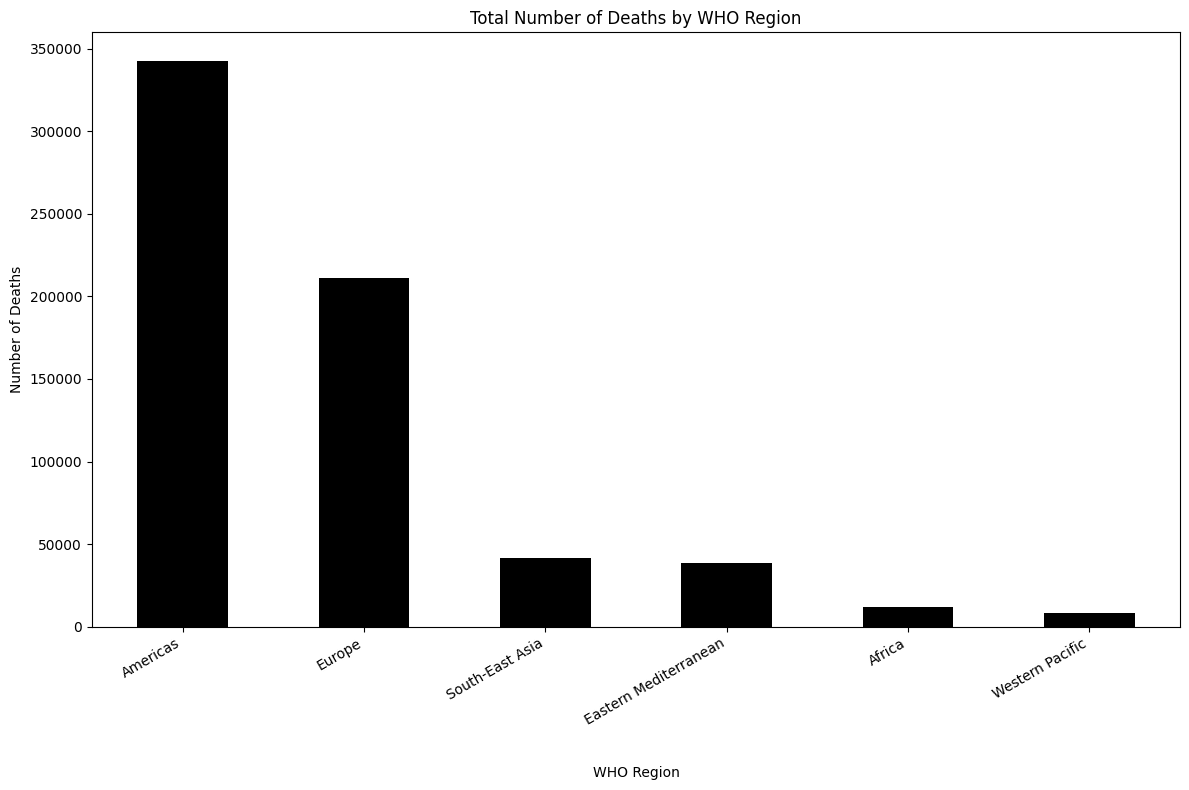

In [ ]:
plt.figure(figsize=(12, 8))
deaths_by_region = df.groupby('WHO Region')['Deaths'].sum().sort_values(ascending=False)
deaths_by_region.plot(kind='bar', color='black')
plt.title('Total Number of Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# **RECOVERED AND ACTIVE CASES IN EACH REGION**

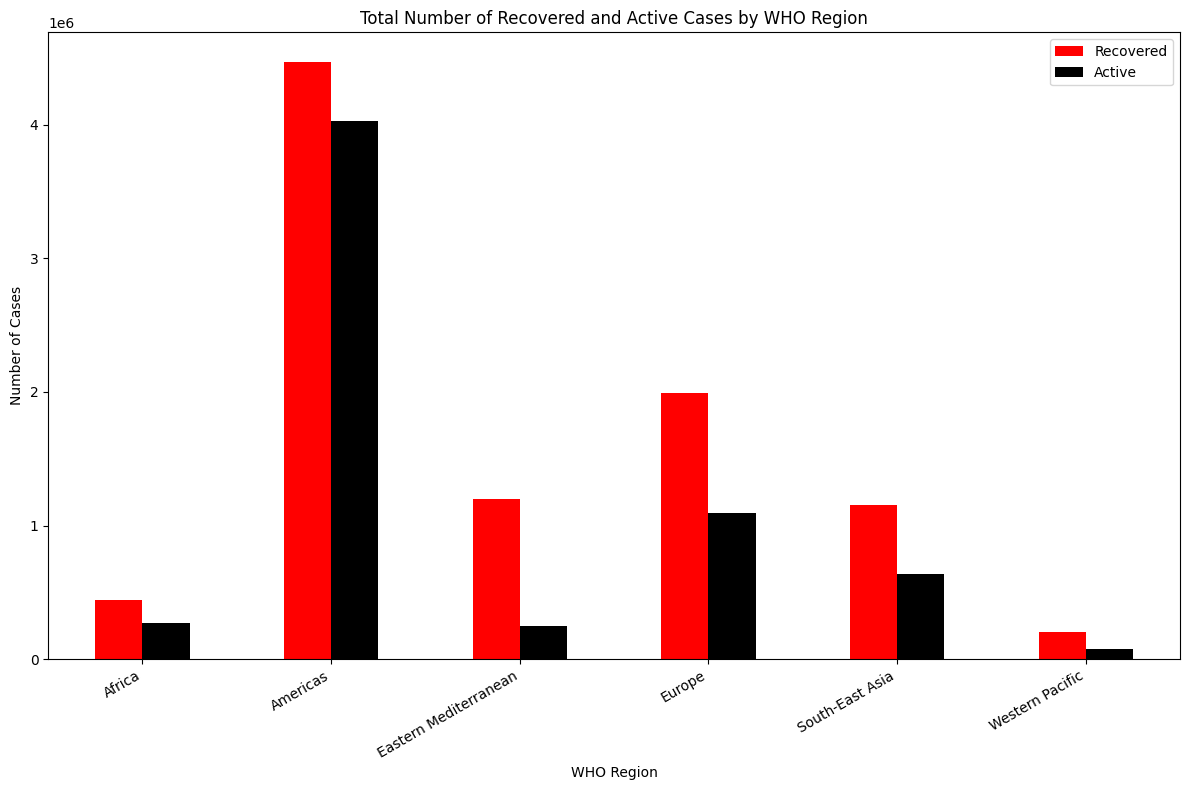

In [ ]:
recovered_active_by_region = df.groupby('WHO Region')[['Recovered', 'Active']].sum()
recovered_active_by_region.plot(kind='bar', figsize=(12, 8), color = ('red','black'))
plt.title('Total Number of Recovered and Active Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Cases')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#**APPLY ANY ML METHOD FOR THE PREDICTION OF DEATH IN EACH REGION**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [ ]:
X = df[['Confirmed', 'Recovered', 'Active']]  # Feature selection
y = df['Deaths']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
}

# Evaluate models
for model_name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} - Cross-validation scores: {scores}")
    print(f"{model_name} - Average cross-validation score: {scores.mean()}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate on test data
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - R² score on test data: {r2}")

Linear Regression - Cross-validation scores: [1. 1. 1. 1. 1.]
Linear Regression - Average cross-validation score: 1.0
Linear Regression - R² score on test data: 1.0
Ridge Regression - Cross-validation scores: [1. 1. 1. 1. 1.]
Ridge Regression - Average cross-validation score: 1.0
Ridge Regression - R² score on test data: 1.0
Decision Tree Regressor - Cross-validation scores: [-2.96736097  0.29978474  0.4822624   0.82064614 -0.24695259]
Decision Tree Regressor - Average cross-validation score: -0.3223240546339737
Decision Tree Regressor - R² score on test data: -0.30802574924531356
Random Forest Regressor - Cross-validation scores: [0.51210099 0.47800826 0.81513371 0.63235695 0.39778822]
Random Forest Regressor - Average cross-validation score: 0.5670776275536588
Random Forest Regressor - R² score on test data: 0.1522930534767557
Lasso Regression - Cross-validation scores: [0.64608802 0.59154819 0.17671526 0.93593697 0.6394797 ]
Lasso Regression - Average cross-validation score: 0.59795

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.899e+08, tolerance: 3.334e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.790e+08, tolerance: 3.156e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.025e+08, tolerance: 2.452e

# **MODEL SUMMARY: LASSO REGRESSION PROVIDES THE HIGHEST ACCURACY**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"{model_name} - MAE: {mae}")
print(f"{model_name} - MSE: {mse}\n")

Lasso Regression - MAE: 2935.7815700721185
Lasso Regression - MSE: 49827336.32592433



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
X = df[['Confirmed', 'Recovered', 'Active']]
y = df['Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=0.1, max_iter = 6000)
lasso_cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=5)
print("Lasso Regression - Cross-validation scores:", lasso_cv_scores)
print("Lasso Regression - Average cross-validation score:", lasso_cv_scores.mean())
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression - R² score on test data:", r2_lasso)

Lasso Regression - Cross-validation scores: [0.88900604 0.79506827 0.59003627 0.9978937  0.86726972]
Lasso Regression - Average cross-validation score: 0.827854800323413
Lasso Regression - R² score on test data: 0.8210913047265065


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.791e+08, tolerance: 3.334e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e+08, tolerance: 3.156e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+08, tolerance: 2.452e

# **HETEROGENEOUS ENSEMBLE MODEL**

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#! You can use any models that can give higher accuracy
model1 = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=1000)
model2 = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
model3 = XGBRegressor(n_estimators=150, max_depth=6, learning_rate=0.1,
random_state=42)
model4 = SVR(kernel='rbf', C=1.5, epsilon=0.05)
voting_model = VotingRegressor( estimators=[
('elasticnet', model1), ('rf', model2),
('xgb', model3),
('svr', model4)
],
weights=[0.22, 0.23, 0.24, 0.31]
)
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)
r2_voting = r2_score(y_test, y_pred_voting)
print("Heterogeneous Ensemble (Voting Regressor) - R² score on test data:", r2_voting)

Heterogeneous Ensemble (Voting Regressor) - R² score on test data: 0.20078381748503749
